# Lecture 2

## Simple Moving Averages

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
SP500 = yf.download("^GSPC", start = "2012-01-01", end = "2022-09-06")

[*********************100%***********************]  1 of 1 completed


In [4]:
SP500 = SP500.Close.to_frame()

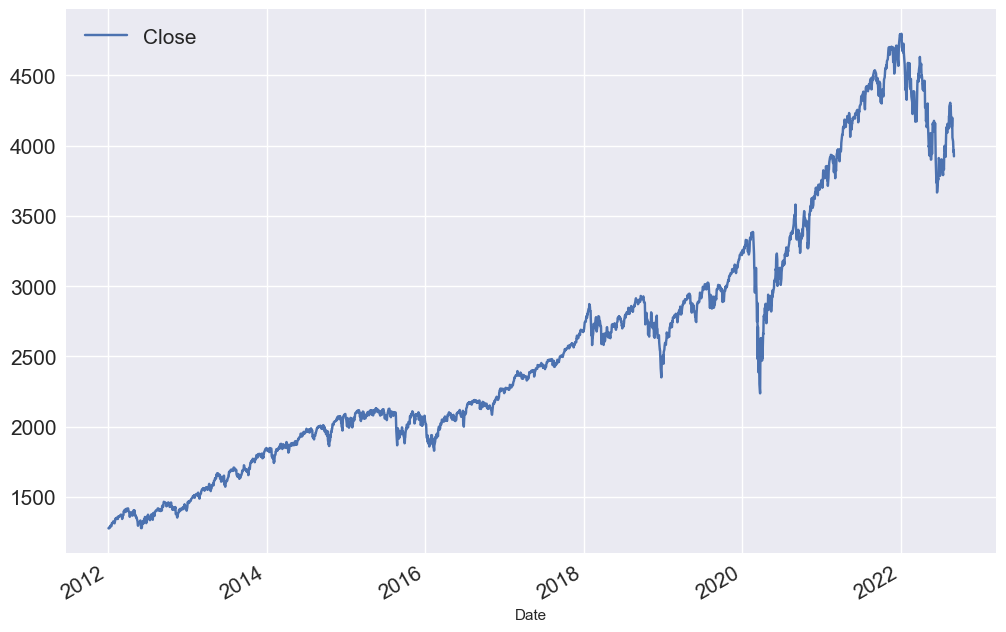

In [5]:
SP500.plot(figsize = (12,8), fontsize= 15)
plt.legend(loc = "upper left", fontsize = 15)
plt.show()

In [6]:
SP500["SMA50"] = SP500.rolling(window = 50, min_periods=50).mean()

In [7]:
SP500["SMA200"] = SP500.Close.rolling(window = 200).mean()

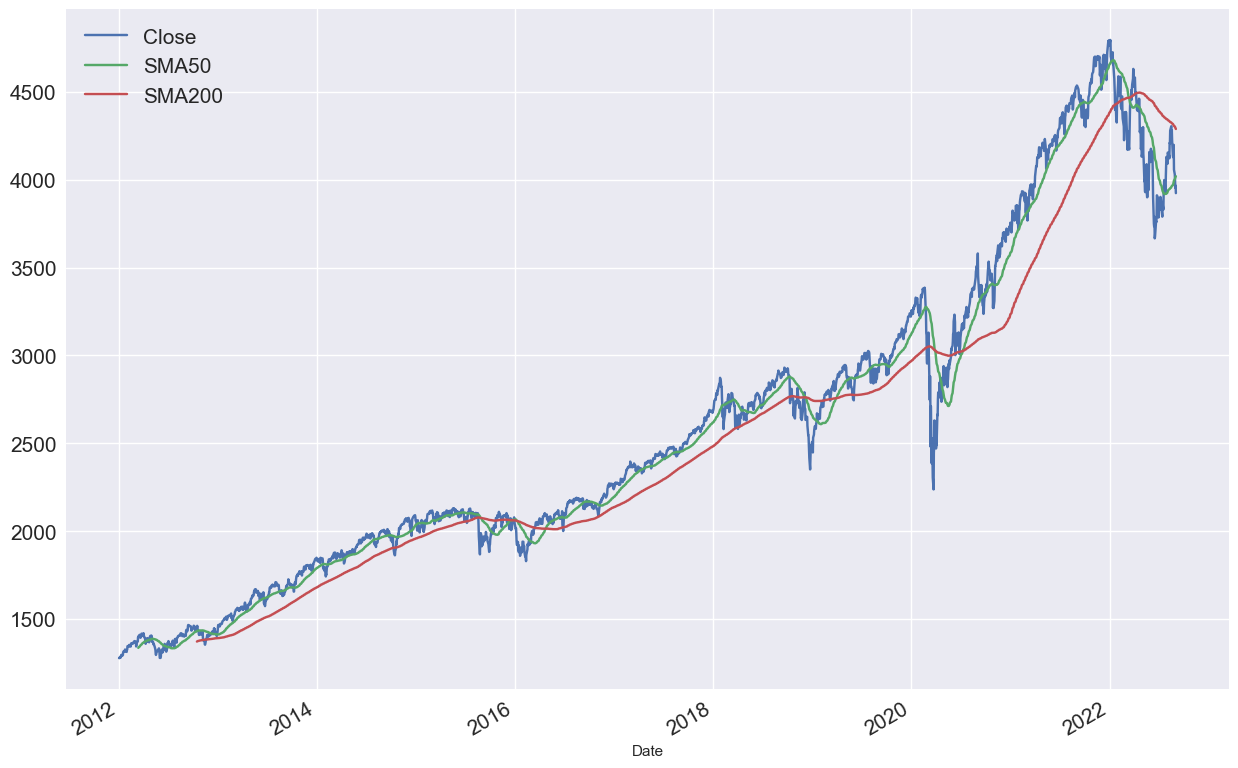

In [8]:
SP500.plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

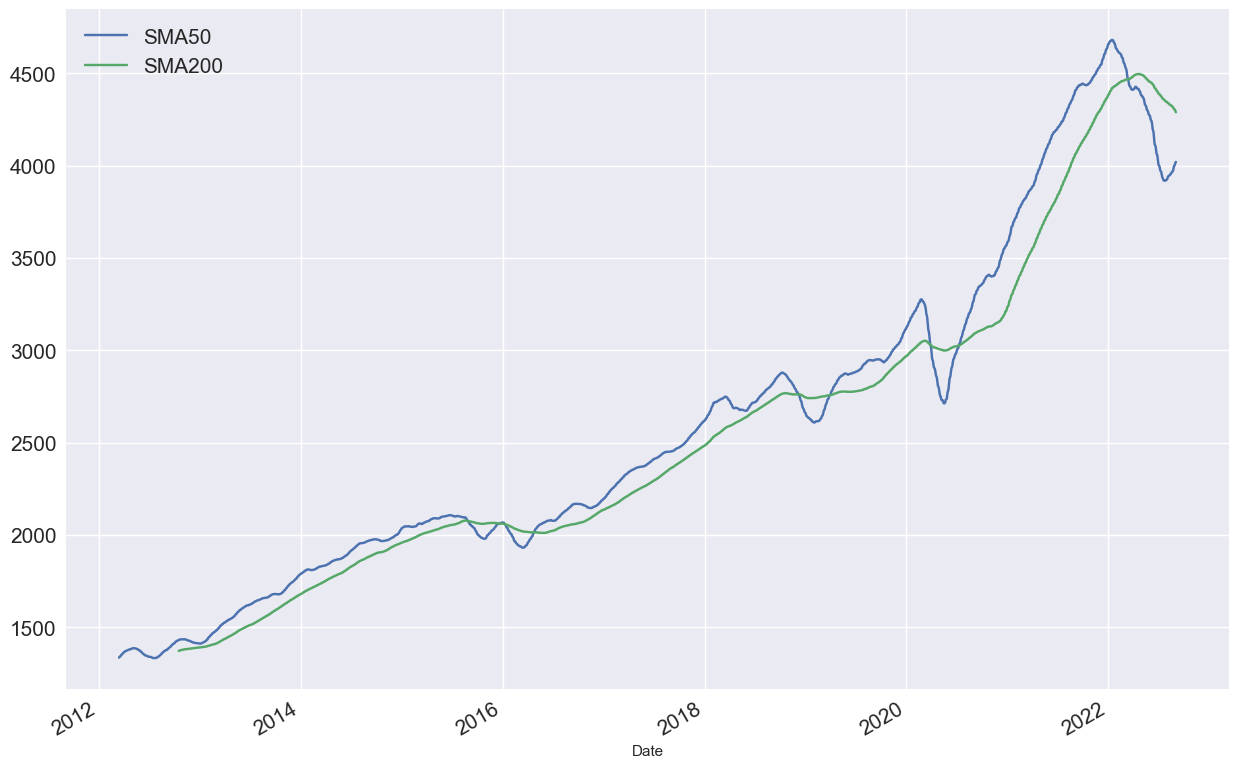

In [9]:
SP500.iloc[:,-2:].plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

## Exponentially weighted moving averages


Exponential Moving Average (EMA) is similar to Simple Moving Average (SMA), measuring trend direction over a period of time. However, whereas SMA simply calculates an average of price data, EMA applies more weight to data that is more current. Because of its unique calculation, EMA will follow prices more closely than a corresponding SMA

In [10]:
SP500["SMA"] = SP500.Close.rolling(window = 100).mean()
SP500["EMA"] = SP500.Close.ewm(span = 100, min_periods= 100).mean()

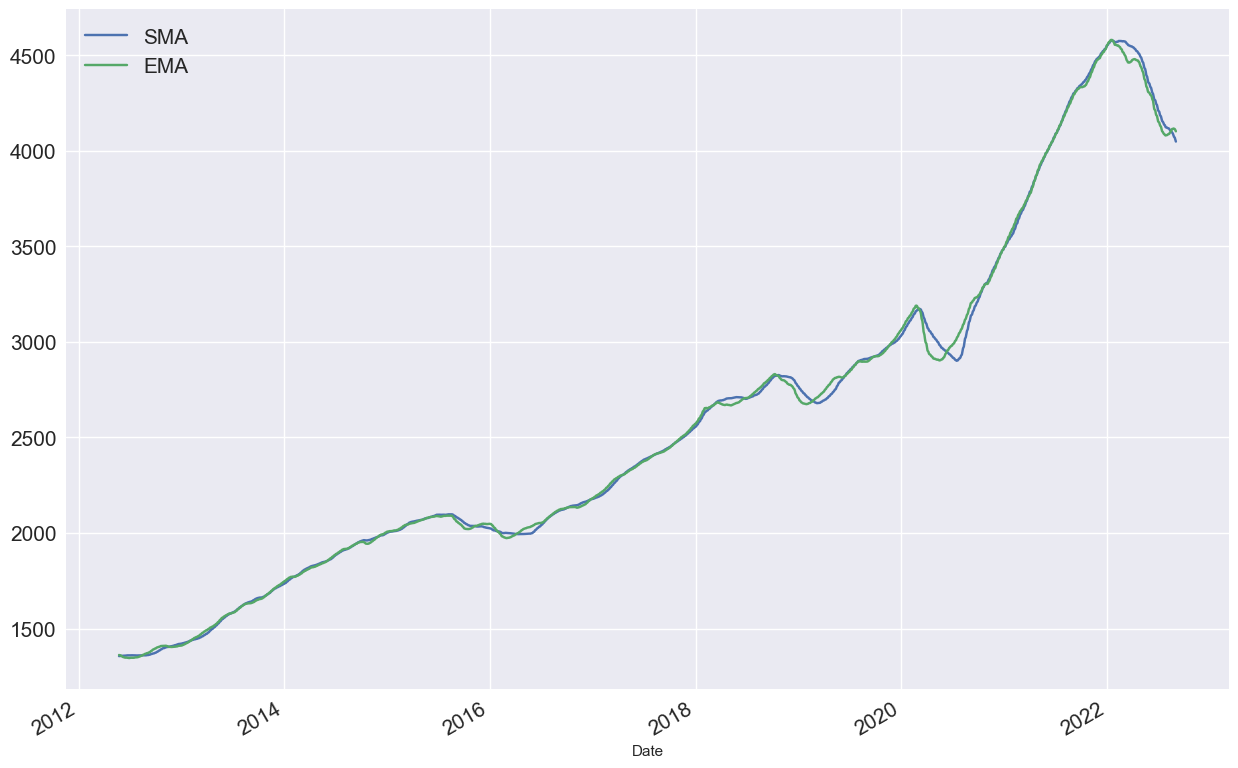

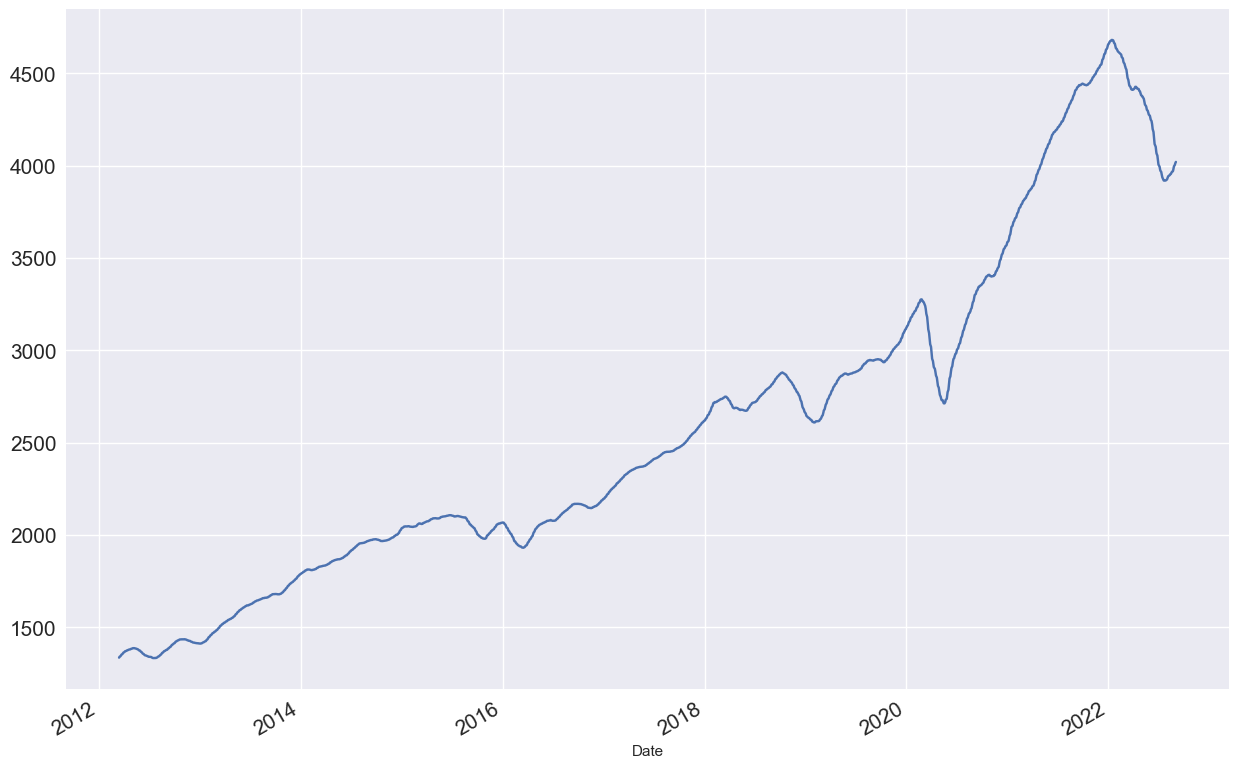

In [11]:
SP500.iloc[:,-2:].plot(figsize = (15,10), fontsize =15)

plt.legend(fontsize = 15)
plt.show()

SP500.iloc[:,1].plot(figsize = (15,10), fontsize =15)
plt.show()

## SMA strategy and backtesting

In [12]:
GBPUSD = yf.download("GBPUSD=X", start = "2006-01-01", end = "2022-09-06")

[*********************100%***********************]  1 of 1 completed


In [13]:
df = pd.DataFrame()
df["price"] = GBPUSD["Close"]

In [14]:
df

,price
Date,
2006-01-02 00:00:00+00:00,1.719188
2006-01-03 00:00:00+00:00,1.748588
2006-01-04 00:00:00+00:00,1.757315
2006-01-05 00:00:00+00:00,1.755310
2006-01-06 00:00:00+00:00,1.770789
...,...
2022-08-30 00:00:00+01:00,1.172251
2022-08-31 00:00:00+01:00,1.165977
2022-09-01 00:00:00+01:00,1.159851


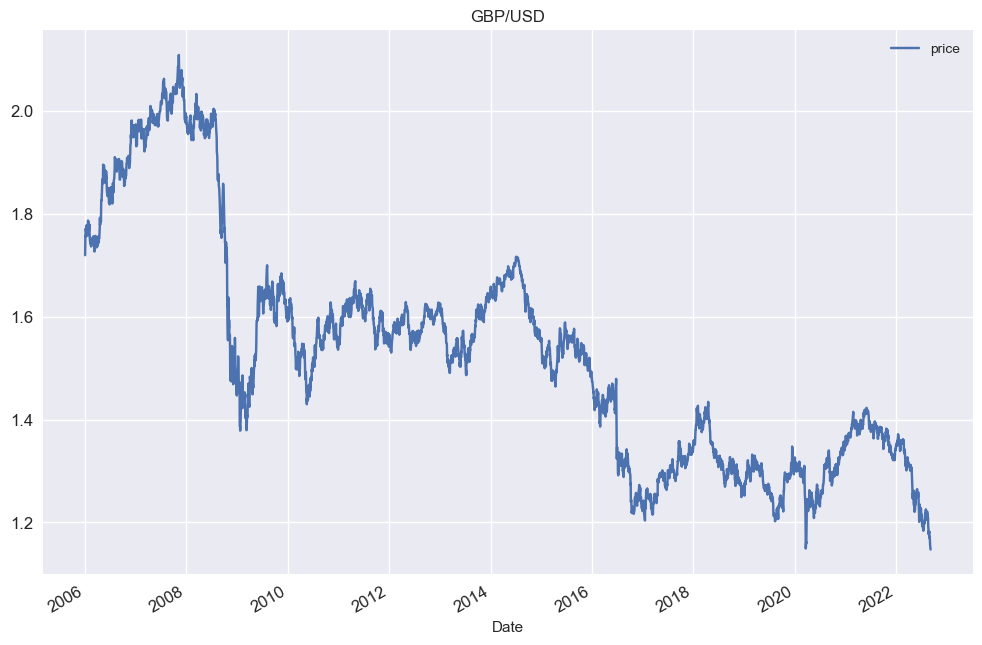

In [15]:
df.plot(figsize = (12, 8), title = "GBP/USD", fontsize = 12)
plt.show()

In [16]:
df["returns"] = np.emath.log(df.div(df.shift(1)))

In [17]:
df

,price,returns
Date,,
2006-01-02 00:00:00+00:00,1.719188,NaN
2006-01-03 00:00:00+00:00,1.748588,0.016957
2006-01-04 00:00:00+00:00,1.757315,0.004978
2006-01-05 00:00:00+00:00,1.755310,-0.001142
2006-01-06 00:00:00+00:00,1.770789,0.008780
...,...,...
2022-08-30 00:00:00+01:00,1.172251,0.002389
2022-08-31 00:00:00+01:00,1.165977,-0.005366
2022-09-01 00:00:00+01:00,1.159851,-0.005268


### Simple Buy and Hold Strategy

In [18]:
df = df.fillna(0)

In [19]:
df

,price,returns
Date,,
2006-01-02 00:00:00+00:00,1.719188,0.000000
2006-01-03 00:00:00+00:00,1.748588,0.016957
2006-01-04 00:00:00+00:00,1.757315,0.004978
2006-01-05 00:00:00+00:00,1.755310,-0.001142
2006-01-06 00:00:00+00:00,1.770789,0.008780
...,...,...
2022-08-30 00:00:00+01:00,1.172251,0.002389
2022-08-31 00:00:00+01:00,1.165977,-0.005366
2022-09-01 00:00:00+01:00,1.159851,-0.005268


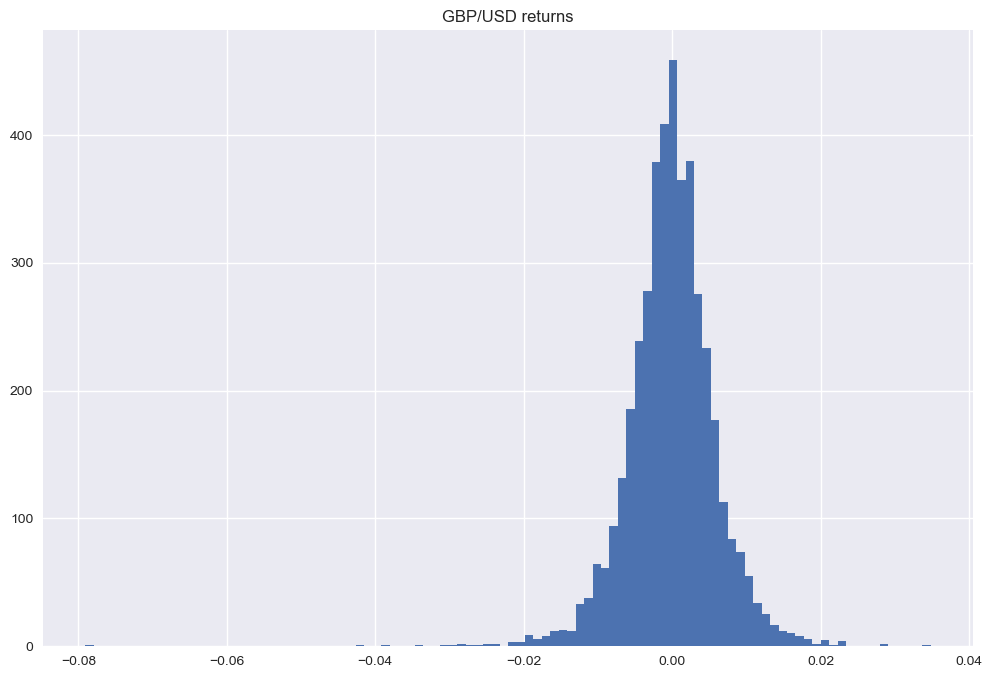

In [20]:
df.returns.hist(bins = 100, figsize = (12, 8))
plt.title("GBP/USD returns")
plt.show()

In [21]:
df.returns.sum()

-0.4043011086569208

In [22]:
np.exp(df.returns.sum())

0.6674431181076872

In [23]:
df.price[-1] / df.price[0]

0.6674431181076875

In [24]:
df.returns.cumsum().apply(np.exp)

Date
2006-01-02 00:00:00+00:00    1.000000
2006-01-03 00:00:00+00:00    1.017101
2006-01-04 00:00:00+00:00    1.022177
2006-01-05 00:00:00+00:00    1.021011
2006-01-06 00:00:00+00:00    1.030015
                               ...   
2022-08-30 00:00:00+01:00    0.681863
2022-08-31 00:00:00+01:00    0.678214
2022-09-01 00:00:00+01:00    0.674650
2022-09-02 00:00:00+01:00    0.671767
2022-09-05 00:00:00+01:00    0.667443
Name: returns, Length: 4336, dtype: float64

In [25]:
df["creturns"] = df.returns.cumsum().apply(np.exp)

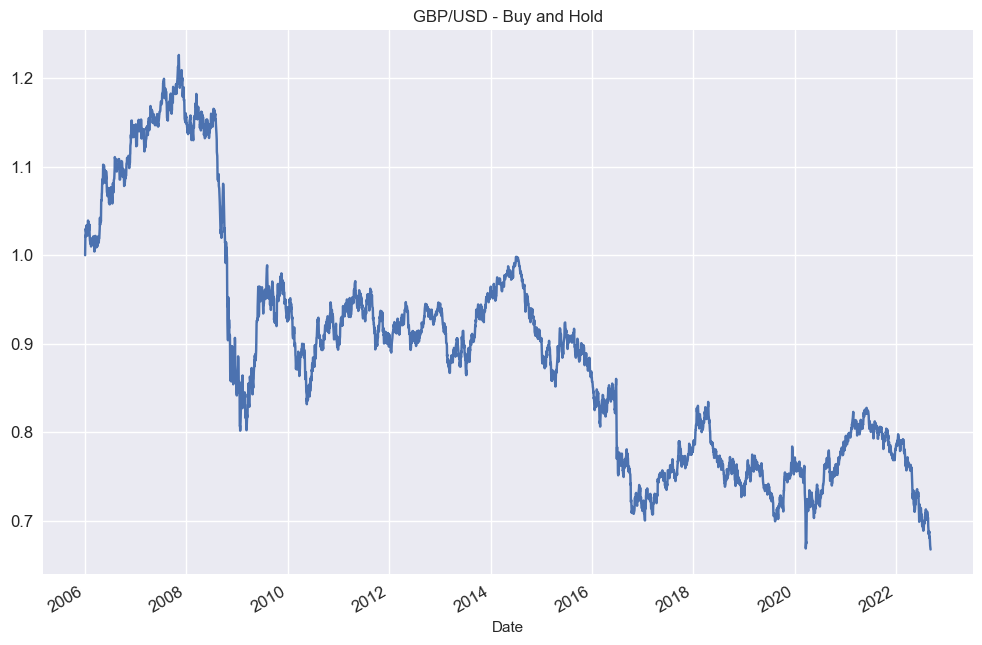

In [26]:
df.creturns.plot(figsize = (12, 8), title = "GBP/USD - Buy and Hold", fontsize = 12)
plt.show()

### Performance metrics

In [27]:
df.creturns.iloc[-1] # absolute Performance 

0.6674431181076873

In [28]:
df.returns.mean() * 252 # mean return

-0.023497204654415137

In [29]:
df.returns.std() * np.sqrt(252) # risk

0.09467580158097633

In [30]:
df["cummax"] = df.creturns.cummax()

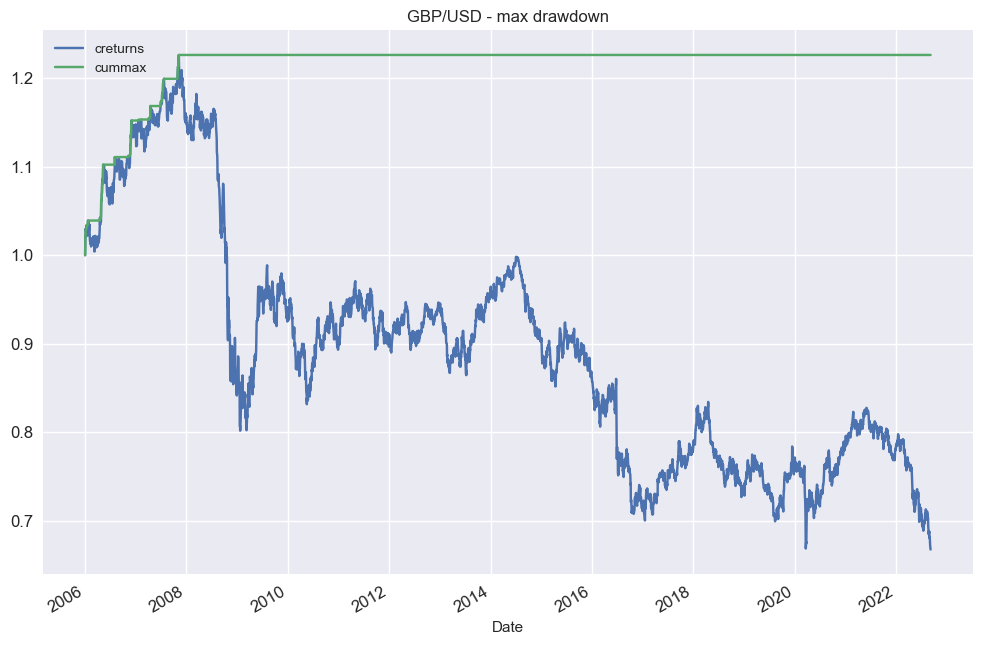

In [31]:
df[["creturns", "cummax"]].dropna().plot(figsize = (12, 8), title = "GBP/USD - max drawdown", fontsize = 12)
plt.show()

In [32]:
drawdown = df["cummax"] - df["creturns"]
drawdown

Date
2006-01-02 00:00:00+00:00    0.000000
2006-01-03 00:00:00+00:00    0.000000
2006-01-04 00:00:00+00:00    0.000000
2006-01-05 00:00:00+00:00    0.001166
2006-01-06 00:00:00+00:00    0.000000
                               ...   
2022-08-30 00:00:00+01:00    0.544409
2022-08-31 00:00:00+01:00    0.548059
2022-09-01 00:00:00+01:00    0.551622
2022-09-02 00:00:00+01:00    0.554505
2022-09-05 00:00:00+01:00    0.558829
Length: 4336, dtype: float64

In [33]:
drawdown.max() # maximum drawdown

0.558829180659861

### Defining an SMA strategy


In [50]:
GBPUSD = yf.download("GBPUSD=x", start = "2006-01-01", end = "2022-09-06")
GBPUSD

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-02 00:00:00+00:00,1.721704,1.725209,1.719188,1.719188,1.719188,0
2006-01-03 00:00:00+00:00,1.719010,1.748894,1.719010,1.748588,1.748588,0
2006-01-04 00:00:00+00:00,1.747702,1.761090,1.746786,1.757315,1.757315,0
2006-01-05 00:00:00+00:00,1.757315,1.758798,1.749200,1.755310,1.755310,0
2006-01-06 00:00:00+00:00,1.755310,1.772107,1.751989,1.770789,1.770789,0
...,...,...,...,...,...,...
2022-08-30 00:00:00+01:00,1.172127,1.175807,1.162304,1.172251,1.172251,0
2022-08-31 00:00:00+01:00,1.166086,1.169454,1.160025,1.165977,1.165977,0
2022-09-01 00:00:00+01:00,1.159689,1.161710,1.150324,1.159851,1.159851,0


In [51]:
data = pd.DataFrame()
data["price"] = GBPUSD["Close"]

In [52]:
sma_s = 50
sma_l = 200

In [53]:
data.price.rolling(50).mean()

Date
2006-01-02 00:00:00+00:00         NaN
2006-01-03 00:00:00+00:00         NaN
2006-01-04 00:00:00+00:00         NaN
2006-01-05 00:00:00+00:00         NaN
2006-01-06 00:00:00+00:00         NaN
                               ...   
2022-08-30 00:00:00+01:00    1.203701
2022-08-31 00:00:00+01:00    1.202487
2022-09-01 00:00:00+01:00    1.201183
2022-09-02 00:00:00+01:00    1.199759
2022-09-05 00:00:00+01:00    1.198143
Name: price, Length: 4336, dtype: float64

In [54]:
data["SMA_S"] = data.price.rolling(sma_s).mean()

In [55]:
data["SMA_L"] = data.price.rolling(sma_l).mean()

In [56]:
data

,price,SMA_S,SMA_L
Date,,,
2006-01-02 00:00:00+00:00,1.719188,NaN,NaN
2006-01-03 00:00:00+00:00,1.748588,NaN,NaN
2006-01-04 00:00:00+00:00,1.757315,NaN,NaN
2006-01-05 00:00:00+00:00,1.755310,NaN,NaN
2006-01-06 00:00:00+00:00,1.770789,NaN,NaN
...,...,...,...
2022-08-30 00:00:00+01:00,1.172251,1.203701,1.282586
2022-08-31 00:00:00+01:00,1.165977,1.202487,1.281728
2022-09-01 00:00:00+01:00,1.159851,1.201183,1.280861


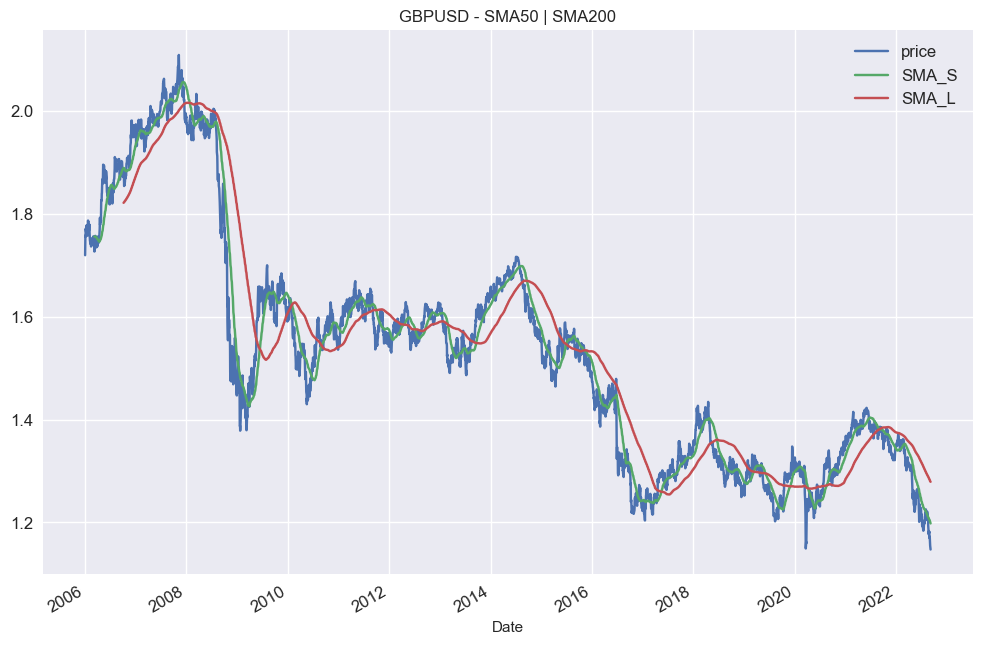

In [57]:
data.plot(figsize = (12, 8), title = "GBPUSD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [58]:
data.dropna(inplace = True)

In [59]:
data

,price,SMA_S,SMA_L
Date,,,
2006-10-06 00:00:00+01:00,1.871293,1.888513,1.820959
2006-10-09 00:00:00+01:00,1.867483,1.888498,1.821700
2006-10-10 00:00:00+01:00,1.853603,1.888050,1.822225
2006-10-11 00:00:00+01:00,1.854840,1.887585,1.822713
2006-10-12 00:00:00+01:00,1.859496,1.887031,1.823234
...,...,...,...
2022-08-30 00:00:00+01:00,1.172251,1.203701,1.282586
2022-08-31 00:00:00+01:00,1.165977,1.202487,1.281728
2022-09-01 00:00:00+01:00,1.159851,1.201183,1.280861


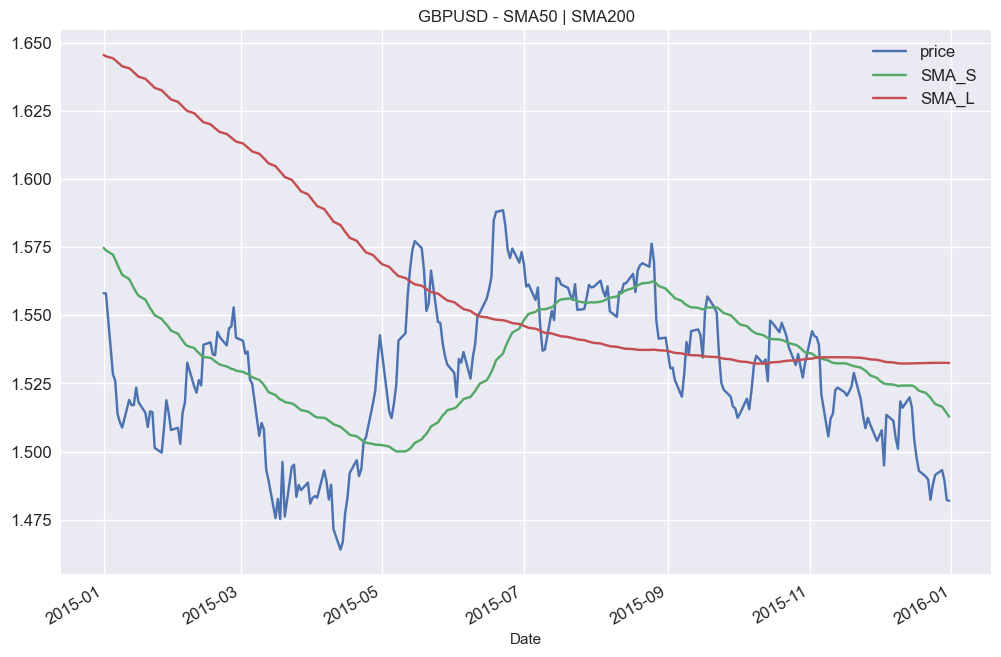

In [62]:
data.loc["2015"].plot(figsize = (12, 8), title = "GBPUSD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [63]:
data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1 )

In [64]:
data

,price,SMA_S,SMA_L,position
Date,,,,
2006-10-06 00:00:00+01:00,1.871293,1.888513,1.820959,1
2006-10-09 00:00:00+01:00,1.867483,1.888498,1.821700,1
2006-10-10 00:00:00+01:00,1.853603,1.888050,1.822225,1
2006-10-11 00:00:00+01:00,1.854840,1.887585,1.822713,1
2006-10-12 00:00:00+01:00,1.859496,1.887031,1.823234,1
...,...,...,...,...
2022-08-30 00:00:00+01:00,1.172251,1.203701,1.282586,-1
2022-08-31 00:00:00+01:00,1.165977,1.202487,1.281728,-1
2022-09-01 00:00:00+01:00,1.159851,1.201183,1.280861,-1


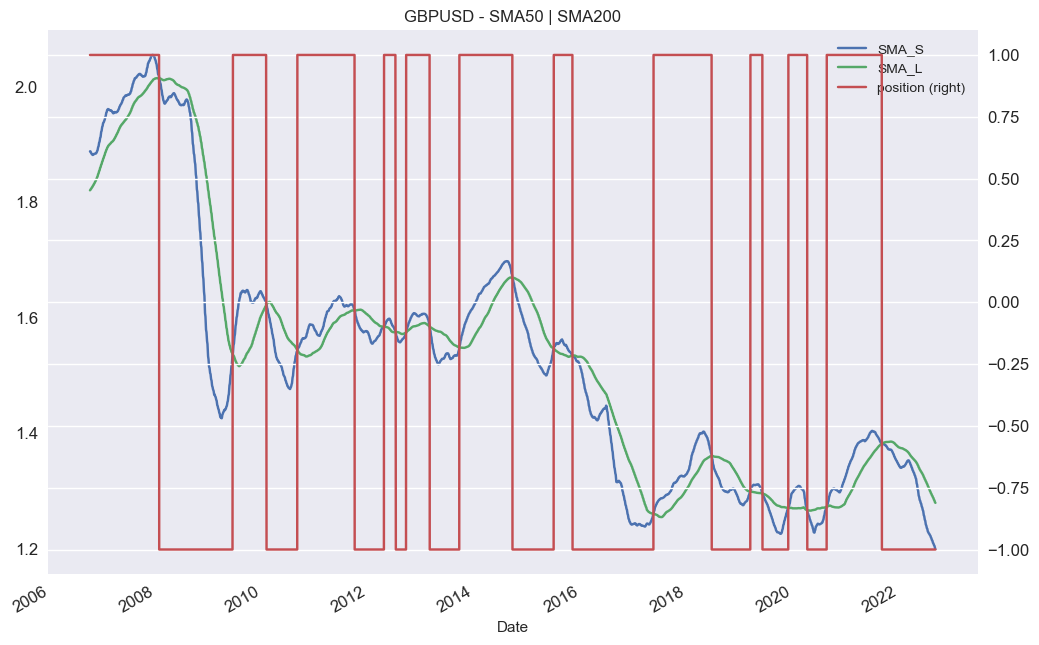

In [65]:
data.loc[:, ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                title = "GBPUSD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

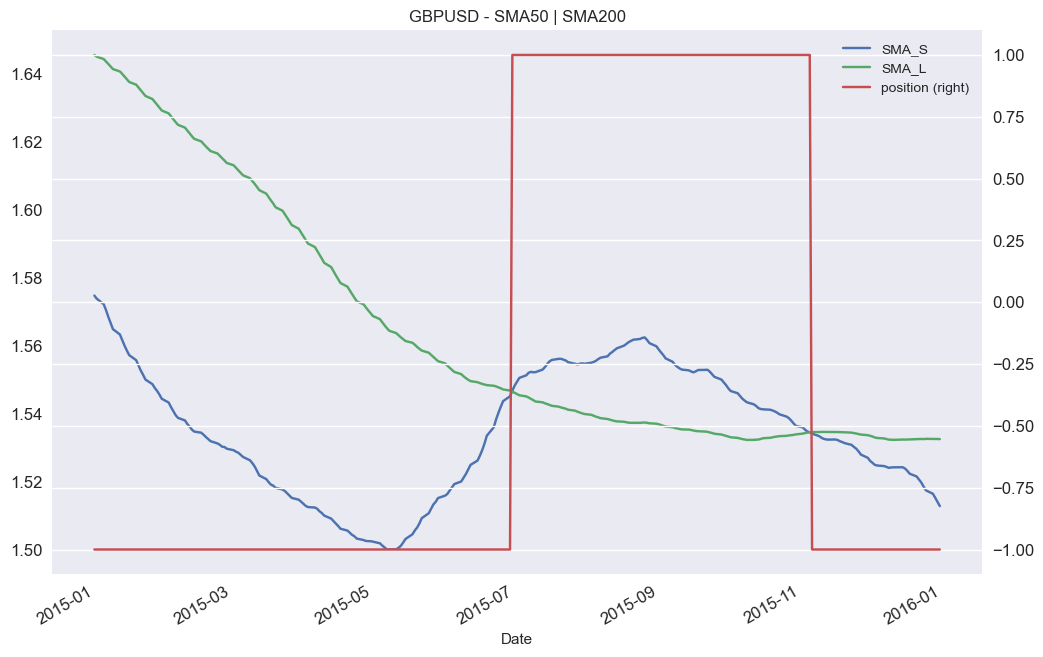

In [66]:
data.loc["2015", ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                     title = "GBPUSD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

### Vectorized Strategy Backtesting

In [67]:
data

,price,SMA_S,SMA_L,position
Date,,,,
2006-10-06 00:00:00+01:00,1.871293,1.888513,1.820959,1
2006-10-09 00:00:00+01:00,1.867483,1.888498,1.821700,1
2006-10-10 00:00:00+01:00,1.853603,1.888050,1.822225,1
2006-10-11 00:00:00+01:00,1.854840,1.887585,1.822713,1
2006-10-12 00:00:00+01:00,1.859496,1.887031,1.823234,1
...,...,...,...,...
2022-08-30 00:00:00+01:00,1.172251,1.203701,1.282586,-1
2022-08-31 00:00:00+01:00,1.165977,1.202487,1.281728,-1
2022-09-01 00:00:00+01:00,1.159851,1.201183,1.280861,-1


In [68]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [69]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [70]:
data

,price,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2006-10-06 00:00:00+01:00,1.871293,1.888513,1.820959,1,NaN,NaN
2006-10-09 00:00:00+01:00,1.867483,1.888498,1.821700,1,-0.002038,-0.002038
2006-10-10 00:00:00+01:00,1.853603,1.888050,1.822225,1,-0.007461,-0.007461
2006-10-11 00:00:00+01:00,1.854840,1.887585,1.822713,1,0.000668,0.000668
2006-10-12 00:00:00+01:00,1.859496,1.887031,1.823234,1,0.002507,0.002507
...,...,...,...,...,...,...
2022-08-30 00:00:00+01:00,1.172251,1.203701,1.282586,-1,0.002389,-0.002389
2022-08-31 00:00:00+01:00,1.165977,1.202487,1.281728,-1,-0.005366,0.005366
2022-09-01 00:00:00+01:00,1.159851,1.201183,1.280861,-1,-0.005268,0.005268


In [71]:
data.dropna(inplace = True)

In [72]:
data[["returns", "strategy"]].sum().apply(np.exp) # absolute performance

returns     0.613191
strategy    1.348980
dtype: float64

In [73]:
data[["returns", "strategy"]].mean() * 252 # annualized return

returns    -0.029799
strategy    0.018239
dtype: float64

In [74]:
data[["returns", "strategy"]].std() * np.sqrt(252) # annualized risk

returns     0.095381
strategy    0.095392
dtype: float64

In [75]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [76]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2006-10-09 00:00:00+01:00,1.867483,1.888498,1.821700,1,-0.002038,-0.002038,0.997964,0.997964
2006-10-10 00:00:00+01:00,1.853603,1.888050,1.822225,1,-0.007461,-0.007461,0.990547,0.990547
2006-10-11 00:00:00+01:00,1.854840,1.887585,1.822713,1,0.000668,0.000668,0.991208,0.991208
2006-10-12 00:00:00+01:00,1.859496,1.887031,1.823234,1,0.002507,0.002507,0.993696,0.993696
2006-10-13 00:00:00+01:00,1.855184,1.885939,1.823656,1,-0.002322,-0.002322,0.991392,0.991392
...,...,...,...,...,...,...,...,...
2022-08-30 00:00:00+01:00,1.172251,1.203701,1.282586,-1,0.002389,-0.002389,0.626439,1.320452
2022-08-31 00:00:00+01:00,1.165977,1.202487,1.281728,-1,-0.005366,0.005366,0.623086,1.327557
2022-09-01 00:00:00+01:00,1.159851,1.201183,1.280861,-1,-0.005268,0.005268,0.619813,1.334569


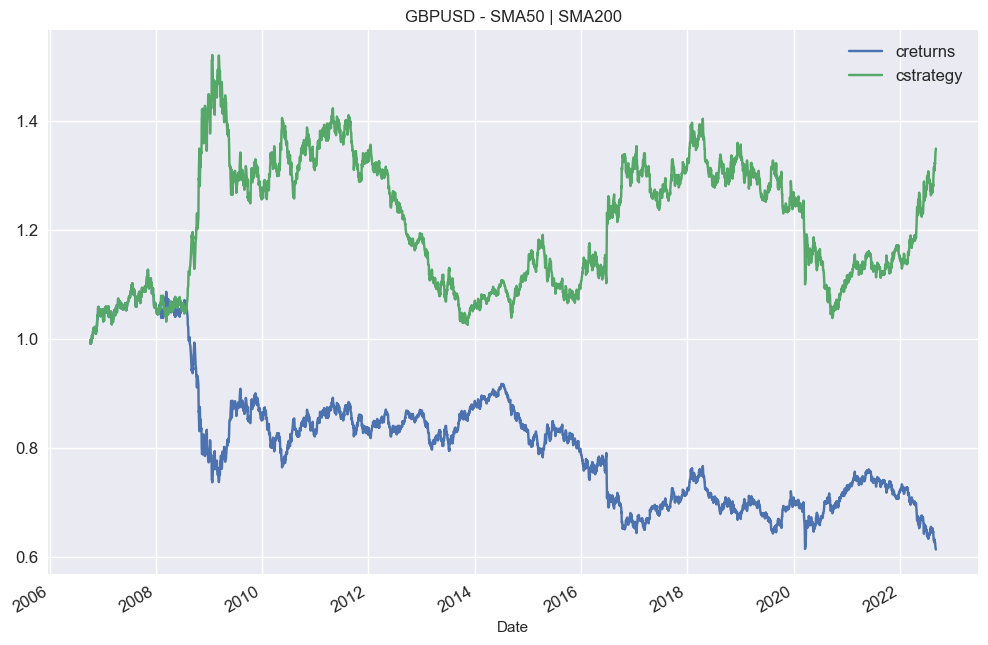

In [77]:
data[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "GBPUSD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [78]:
outperf = data.cstrategy.iloc[-1] - data.creturns.iloc[-1]
outperf

0.7357886311094528

### Finding the Optimal SMA Strategy

In [79]:
GBPUSD = yf.download("GBPUSD=x", start = "2006-01-01", end = "2022-09-06")
GBPUSD

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-02 00:00:00+00:00,1.721704,1.725209,1.719188,1.719188,1.719188,0
2006-01-03 00:00:00+00:00,1.719010,1.748894,1.719010,1.748588,1.748588,0
2006-01-04 00:00:00+00:00,1.747702,1.761090,1.746786,1.757315,1.757315,0
2006-01-05 00:00:00+00:00,1.757315,1.758798,1.749200,1.755310,1.755310,0
2006-01-06 00:00:00+00:00,1.755310,1.772107,1.751989,1.770789,1.770789,0
...,...,...,...,...,...,...
2022-08-30 00:00:00+01:00,1.172127,1.175807,1.162304,1.172251,1.172251,0
2022-08-31 00:00:00+01:00,1.166086,1.169454,1.160025,1.165977,1.165977,0
2022-09-01 00:00:00+01:00,1.159689,1.161710,1.150324,1.159851,1.159851,0


In [80]:
data = pd.DataFrame()
data["price"] = GBPUSD["Close"]

In [81]:
def test_strategy(SMA):
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)
    
    
    return np.exp(data["strategy"].sum())

In [82]:
test_strategy((50, 200))

1.3489798062872187

In [83]:
test_strategy((75, 150))

1.5817621402326825

In [84]:
test_strategy((25, 252))

1.0821956324220587

In [85]:
SMA_S_range = range(10, 50, 1)
SMA_L_range = range(100, 252, 1)

In [86]:
from itertools import product

In [87]:
list(product(SMA_S_range, SMA_L_range))

[(10, 100),
 (10, 101),
 (10, 102),
 (10, 103),
 (10, 104),
 (10, 105),
 (10, 106),
 (10, 107),
 (10, 108),
 (10, 109),
 (10, 110),
 (10, 111),
 (10, 112),
 (10, 113),
 (10, 114),
 (10, 115),
 (10, 116),
 (10, 117),
 (10, 118),
 (10, 119),
 (10, 120),
 (10, 121),
 (10, 122),
 (10, 123),
 (10, 124),
 (10, 125),
 (10, 126),
 (10, 127),
 (10, 128),
 (10, 129),
 (10, 130),
 (10, 131),
 (10, 132),
 (10, 133),
 (10, 134),
 (10, 135),
 (10, 136),
 (10, 137),
 (10, 138),
 (10, 139),
 (10, 140),
 (10, 141),
 (10, 142),
 (10, 143),
 (10, 144),
 (10, 145),
 (10, 146),
 (10, 147),
 (10, 148),
 (10, 149),
 (10, 150),
 (10, 151),
 (10, 152),
 (10, 153),
 (10, 154),
 (10, 155),
 (10, 156),
 (10, 157),
 (10, 158),
 (10, 159),
 (10, 160),
 (10, 161),
 (10, 162),
 (10, 163),
 (10, 164),
 (10, 165),
 (10, 166),
 (10, 167),
 (10, 168),
 (10, 169),
 (10, 170),
 (10, 171),
 (10, 172),
 (10, 173),
 (10, 174),
 (10, 175),
 (10, 176),
 (10, 177),
 (10, 178),
 (10, 179),
 (10, 180),
 (10, 181),
 (10, 182),
 (10

In [88]:
combinations = list(product(SMA_S_range, SMA_L_range))

In [89]:
len(combinations)

6080

In [90]:
results = []
for comb in combinations:
    results.append(test_strategy(comb))

In [91]:
np.max(results)

1.8325354737312671

In [92]:
np.argmax(results)

0

In [93]:
combinations[np.argmax(results)]

(10, 100)

In [94]:
many_results = pd.DataFrame(data = combinations, columns = ["SMA_S", "SMA_L"])
many_results

,SMA_S,SMA_L
0,10,100
1,10,101
2,10,102
3,10,103
4,10,104
...,...,...
6075,49,247
6076,49,248
6077,49,249
6078,49,250


In [95]:
many_results["performance"] = results

In [96]:
many_results

,SMA_S,SMA_L,performance
0,10,100,1.832535
1,10,101,1.451994
2,10,102,1.309624
3,10,103,1.325822
4,10,104,1.318026
...,...,...,...
6075,49,247,1.000000
6076,49,248,1.000000
6077,49,249,1.000000
6078,49,250,1.000000


In [97]:
many_results.nlargest(10, "performance")

,SMA_S,SMA_L,performance
0,10,100,1.832535
1,10,101,1.451994
9,10,109,1.383155
10,10,110,1.374803
12,10,112,1.364575
8,10,108,1.334045
3,10,103,1.325822
13,10,113,1.318470
4,10,104,1.318026
2,10,102,1.309624


## Bollinger Bands Mean Reversion Strategy

__Mean Reversion__: Financial Instruments are from time to time overbought / oversold and revert back to mean prices. 

__Bollinger Bands__: Consists of a SMA (e.g. 30) and Upper and Lower Bands +- (2) Std Dev away from SMA.

In [100]:
EURUSD = yf.download("EURUSD=x", start = "2006-01-01", end = "2022-09-06")
data = pd.DataFrame()
data["price"] = EURUSD["Close"]

[*********************100%***********************]  1 of 1 completed


In [101]:
data

,price
Date,
2006-01-02 00:00:00+00:00,1.181698
2006-01-03 00:00:00+00:00,1.203297
2006-01-04 00:00:00+00:00,1.211196
2006-01-05 00:00:00+00:00,1.210698
2006-01-06 00:00:00+00:00,1.215407
...,...
2022-08-30 00:00:00+01:00,1.001402
2022-08-31 00:00:00+01:00,1.002506
2022-09-01 00:00:00+01:00,1.003905


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4324 entries, 2006-01-02 00:00:00+00:00 to 2022-09-05 00:00:00+01:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4324 non-null   float64
dtypes: float64(1)
memory usage: 67.6 KB


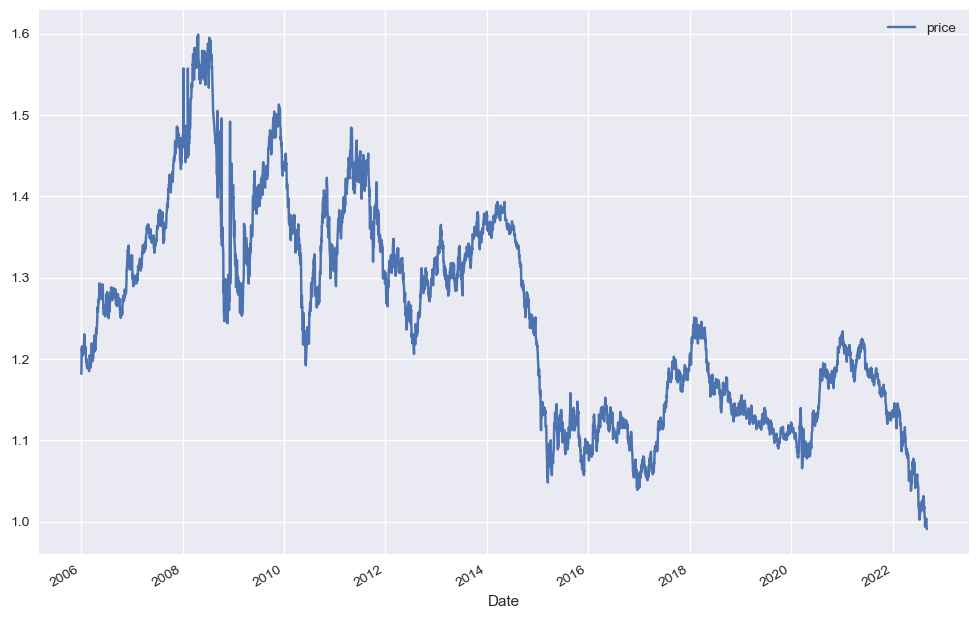

In [103]:
data.plot(figsize = (12, 8))
plt.show()

In [104]:
data["returns"] = np.log(data.div(data.shift(1)))

In [105]:
data

,price,returns
Date,,
2006-01-02 00:00:00+00:00,1.181698,NaN
2006-01-03 00:00:00+00:00,1.203297,0.018113
2006-01-04 00:00:00+00:00,1.211196,0.006543
2006-01-05 00:00:00+00:00,1.210698,-0.000412
2006-01-06 00:00:00+00:00,1.215407,0.003882
...,...,...
2022-08-30 00:00:00+01:00,1.001402,0.007552
2022-08-31 00:00:00+01:00,1.002506,0.001102
2022-09-01 00:00:00+01:00,1.003905,0.001394


In [106]:
SMA = 30
dev = 2

In [107]:
data["SMA"] = data["price"].rolling(SMA).mean()

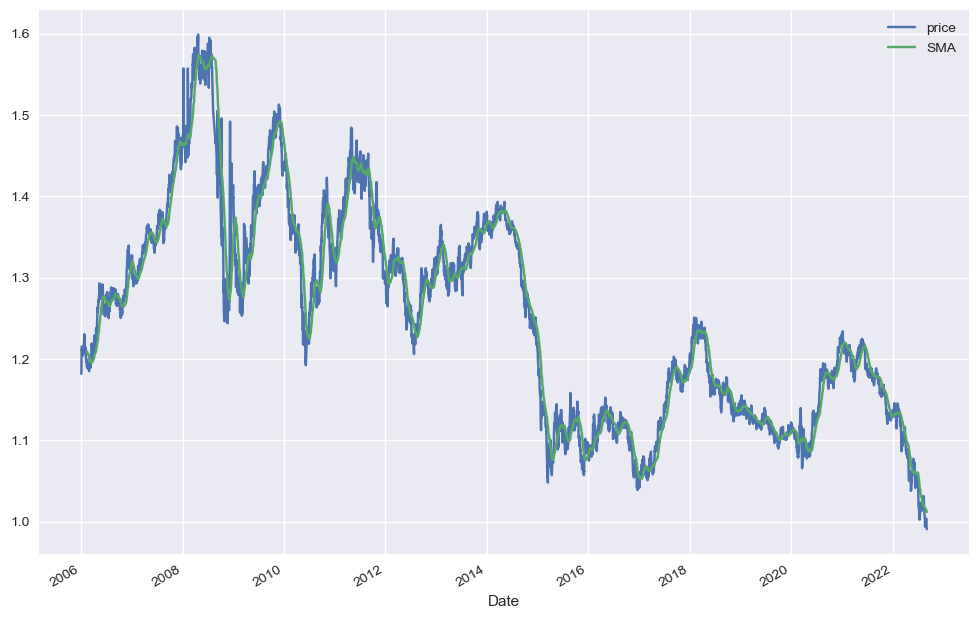

In [108]:
data[["price", "SMA"]].plot(figsize = (12, 8))
plt.show()

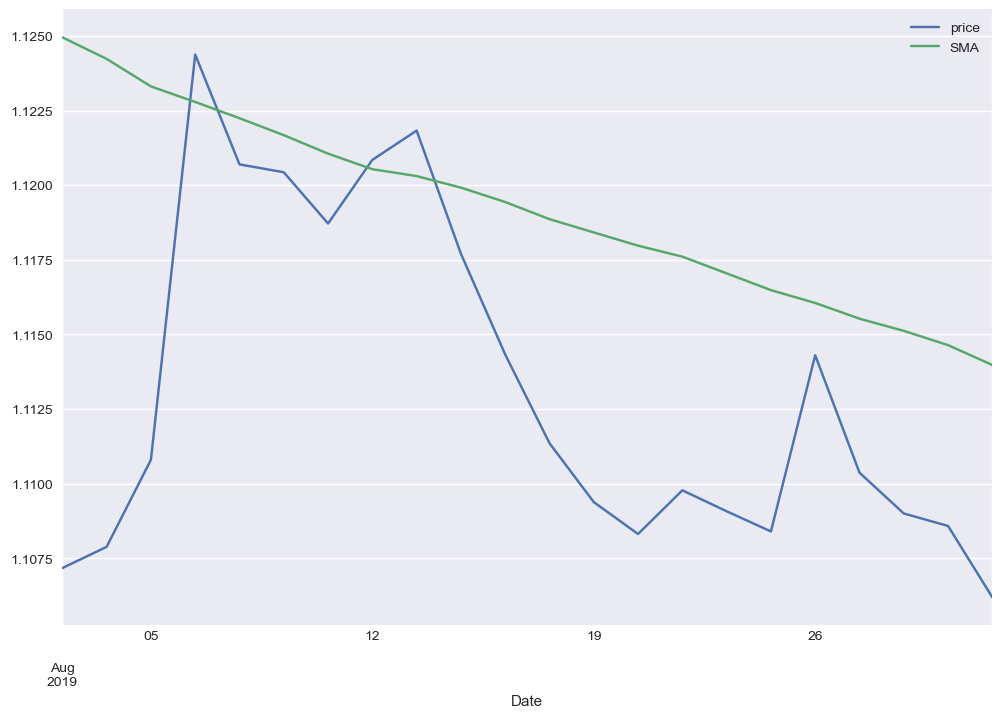

In [110]:
data.loc["2019-08", ["price", "SMA"]].plot(figsize = (12, 8))
plt.show()

In [111]:
data["price"].rolling(SMA).std()

Date
2006-01-02 00:00:00+00:00         NaN
2006-01-03 00:00:00+00:00         NaN
2006-01-04 00:00:00+00:00         NaN
2006-01-05 00:00:00+00:00         NaN
2006-01-06 00:00:00+00:00         NaN
                               ...   
2022-08-30 00:00:00+01:00    0.010890
2022-08-31 00:00:00+01:00    0.011012
2022-09-01 00:00:00+01:00    0.011146
2022-09-02 00:00:00+01:00    0.011535
2022-09-05 00:00:00+01:00    0.012128
Name: price, Length: 4324, dtype: float64

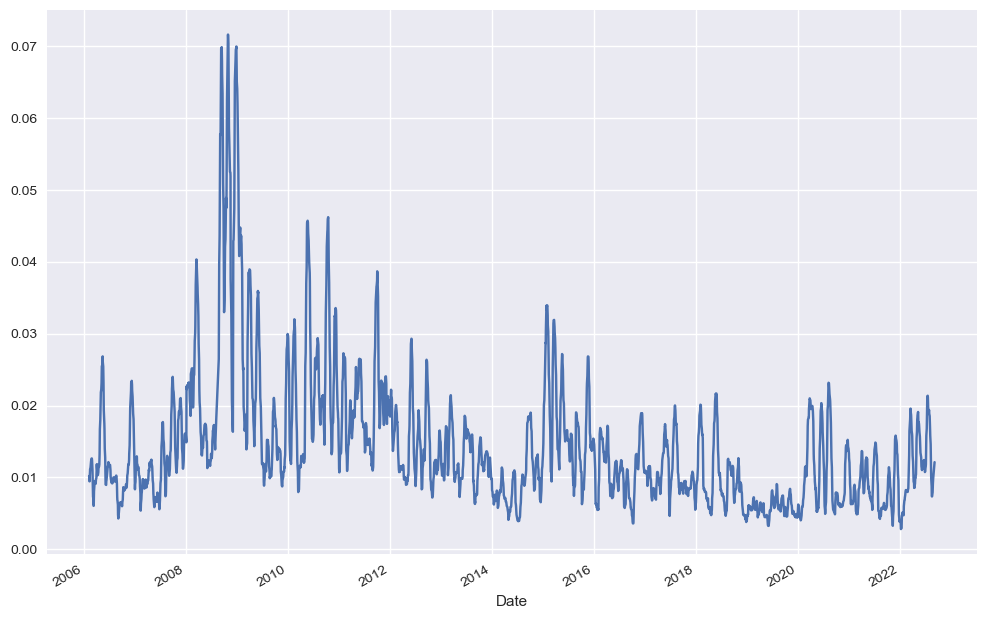

In [112]:
data["price"].rolling(SMA).std().plot(figsize = (12, 8 ))
plt.show()

In [113]:
data["Lower"] = data["SMA"] - data["price"].rolling(SMA).std() * dev # Lower Band -2 Std Dev

In [114]:
data["Upper"] = data["SMA"] + data["price"].rolling(SMA).std() * dev # Upper Band -2 Std Dev

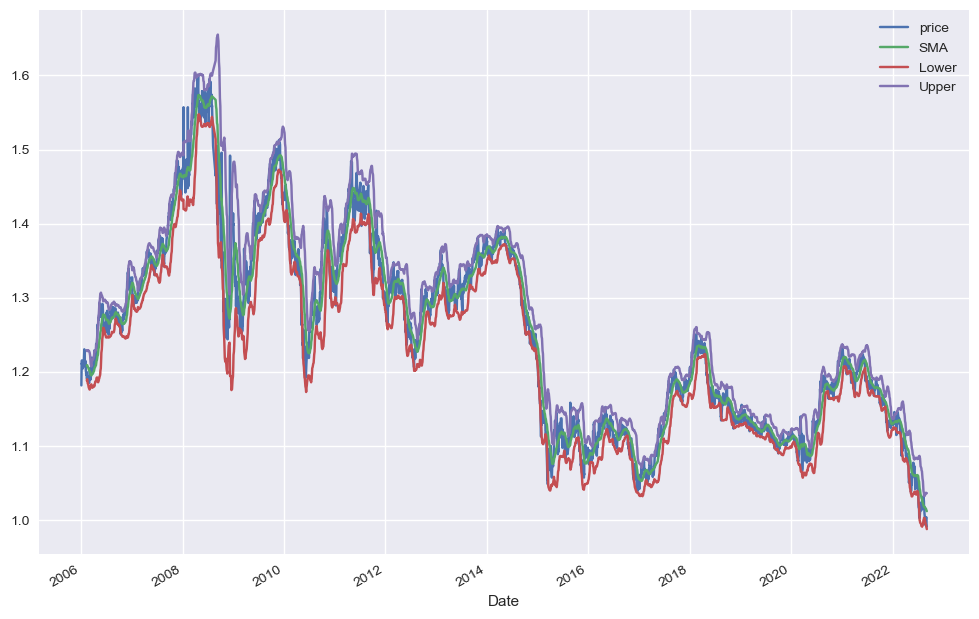

In [115]:
data.drop(columns = "returns").plot(figsize = (12, 8))
plt.show()

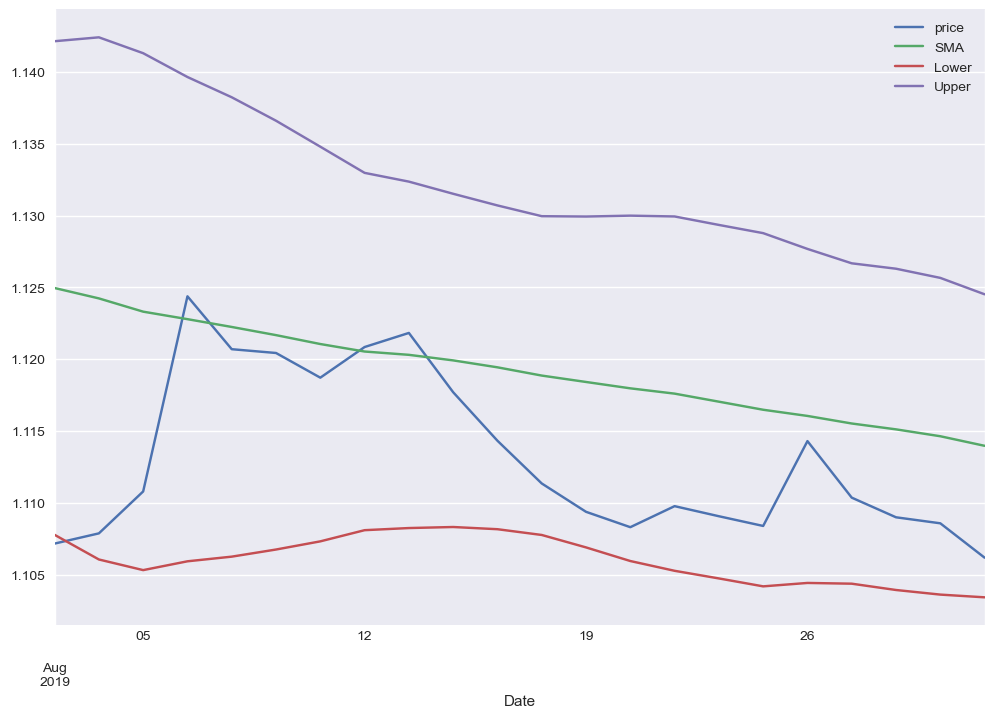

In [116]:
data.drop(columns = "returns").loc["2019-08"].plot(figsize = (12, 8))
plt.show()

In [117]:
data["distance"] = data.price - data.SMA # helper Column

In [118]:
data["position"] = np.where(data.price < data.Lower, 1, np.nan) # 1. oversold -> go long

In [119]:
data["position"] = np.where(data.price > data.Upper, -1, data["position"]) # 2. overbought -> go short

In [120]:
data["position"] = np.where(data.distance * data.distance.shift(1) < 0, 0, data["position"])

In [121]:
data["position"] = data.position.ffill().fillna(0) # where 1-3 isn´t applicable -> hold previous position

In [122]:
data.position.value_counts()

 0.0    1954
 1.0    1215
-1.0    1155
Name: position, dtype: int64

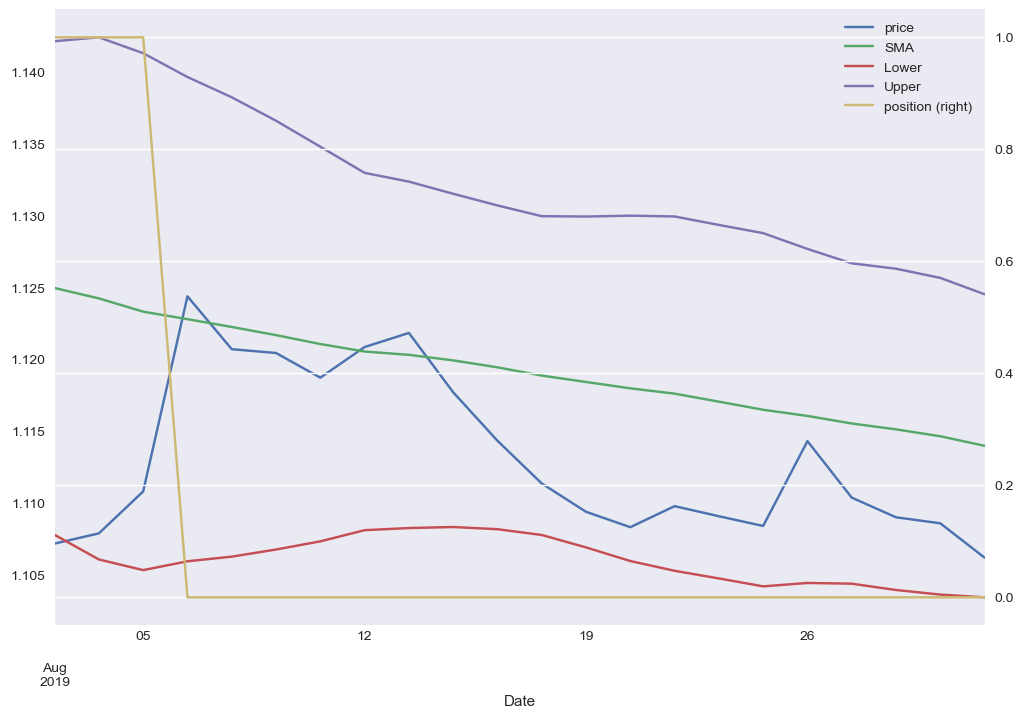

In [123]:
data.drop(columns = ["returns", "distance"]).loc["2019-08"].plot(figsize = (12, 8), secondary_y = "position")
plt.show()

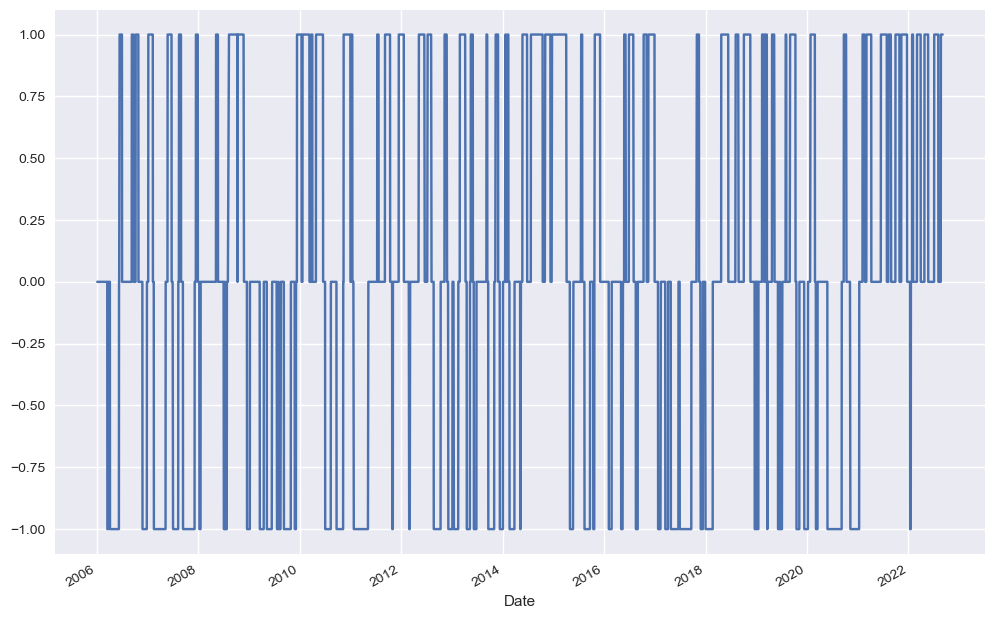

In [124]:
data.position.plot(figsize = (12, 8))
plt.show()